# Random Graphs
**Erdos-Renyi random graph**. This graph is composed by $N$ nodes and each connection between pairs of nodes are stablished according to probability $p$. This is a typical case of a Bernoulli process.

Notice that the average degree of the generated network is not exactly as the input average degree. The input degree is the expected number of connections.

`nx.gnp_random_graph`: Returns a $G_{n,k}$ random graph, also known as an Erdős-Rényi random graph or a binomial graph.


In [19]:
# EVerything in this notebook is the same as Workbook 6 but with a bigger and more complicated graph
# SO if confused, go back and look at workbook 6

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


In [20]:
N = 1000
av_degree = 8 # Average degree we are aiming for - i.e. expected average degree
p = av_degree/(N-1) # p worked out backwards from expected average
G = nx.gnp_random_graph(N, p, seed=None, directed=False)

In [21]:
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)
print('Average degre:', 2*M/N)

Number of nodes: 1000
Number of edges: 3938
Average degre: 7.876


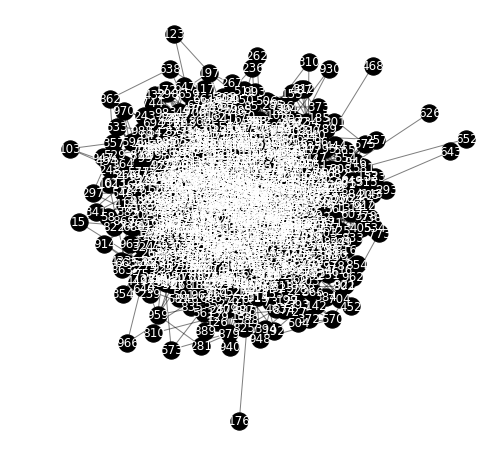

In [22]:
pos = nx.fruchterman_reingold_layout(G);
plt.figure(figsize=(8,8));
plt.axis("off");
nx.draw_networkx_nodes(G, pos, node_size=300, node_color="black");
nx.draw_networkx_edges(G, pos, alpha=0.500);
nx.draw_networkx_labels(G, pos, font_color="white");
plt.show();

In [23]:
def degree_distribution(GER): # From lecture - p(k)
    vk = dict(GER.degree())
    vk = list(vk.values()) # we get only the degree values
    maxk = np.max(vk)
    mink = np.min(min)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

In [24]:
ks, Pk = degree_distribution(G)

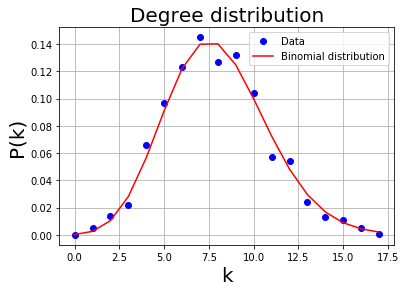

In [25]:
plt.figure()
plt.plot(ks,Pk,'bo', label='Data')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.grid(True)
plt.savefig('degree_dist.eps') #save the figure into a file

## Fitting of. binomial distribution
from scipy.stats import binom
pk = binom.pmf(ks, N, p)
plt.plot(ks, pk, 'r', label='Binomial distribution')
plt.legend()
plt.show(True)

## Expected size of the largest two components: plot (z, expected size)

Recall from `Support_class_7.ipynb` that `sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)`, returns nodes contained in each component listed from largest to smallest

In [11]:
z = np.arange(0.1, 3, 0.1)
N=100
realisations = 20
p = z/N
S1 = np.zeros((len(p), realisations))
S2 = np.zeros((len(p), realisations))

for i in range(realisations):
    for index, j in enumerate(p):
        G=nx.gnp_random_graph(N,j) # build a graph
        Components = sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
        S1[index,i] = len(Components[0])
        S2[index,i] =  len(Components[1])


In [12]:
Expected_S1 = np.mean(S1, axis = 1)
Expected_S2 = np.mean(S2, axis = 1)

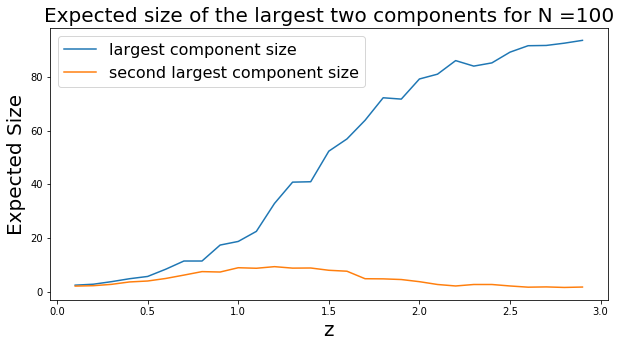

In [13]:
plt.figure(figsize = (10,5))
plt.plot(z, Expected_S1, label = "largest component size")
plt.plot(z, Expected_S2, label = "second largest component size")
plt.ylabel("Expected Size", fontsize = 20)
plt.xlabel("z", fontsize = 20)
plt.title("Expected size of the largest two components for N =100", fontsize = 20)
plt.legend(loc = "upper left", fontsize = 16)

## Expected local clustering coefficient
The clustering coefficient of a random network is equal to $p$.

In [14]:
avc = nx.average_clustering(G)
print("Average clustering:", avc, 'and, p = ', j)

Average clustering: 0.05052380952380954 and, p =  0.029000000000000005


In [15]:
z = np.arange(0.1, 10, 0.1)
N=100
realisations = 20
p = z/N
CC = np.zeros((len(p), realisations))
for i in range(realisations):
    for index, j in enumerate(p):
        G=nx.gnp_random_graph(N,j) # build a graph
        c=nx.average_clustering(G)
        CC[index,i] = c

In [16]:
average_CC = np.mean(CC, axis = 1)

Text(0.5,0,'z')

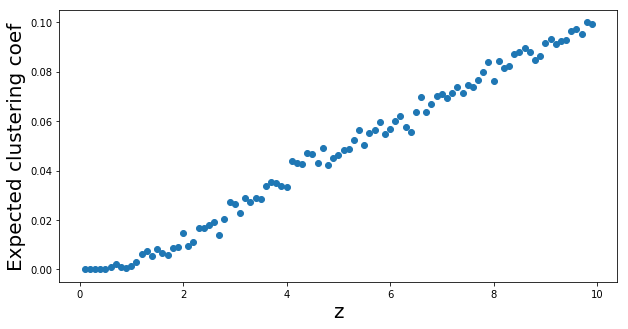

In [17]:
plt.figure(figsize = (10,5))
plt.plot(z, average_CC, "o")
plt.ylabel("Expected clustering coef", fontsize = 20)
plt.xlabel("z", fontsize = 20)

## Wigner semi-circle law
Spectrum of adjacency matrix $A$: set of eigenvalues of a matrix

Plot eigenvalue against spectral density (and compare this to wigner semi-circle law).

Use `nx.to_numpy_matrix(G)` to get the adjacency matrix (in numpy format). There exists `nx.adjacency_matrix(G)` which creates a **sparse matrix** -- better for large data sets

In [49]:
z = 10
N = 100
p = z/N
G = nx.gnp_random_graph(N,p)

In [44]:
# nx.draw(G)

In [62]:
A = nx.to_numpy_matrix(G)
evals, evecs = np.linalg.eig(A/np.sqrt(N))

In [70]:
spectral_density = stats.gaussian_kde(evals, bw_method = 0.05)
λ = np.linspace(evals.min(), evals.max(), N)

Text(0,0.5,'ρ(λ)')

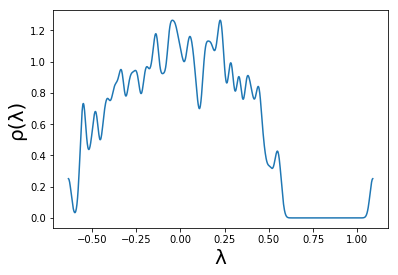

In [71]:
plt.plot(λ, spectral_density(λ))
plt.xlabel('λ', fontsize = 20)
plt.ylabel('ρ(λ)', fontsize = 20)

### Wigner semi cirle
A **wigner matrix** is a real, symmetric matrix with iid entries $a_{ij}$, $\mathbb{E}(a_{ij}) =0$, var$(a_{ij}) = \sigma^2$.

**Wigner semi-circle law** - the spectral density $\rho_N$ of the matrix $\frac{A}{\sqrt{N}}$ converges with probability 1 to: $$ (2 \pi \sigma^2)^{-1} \sqrt{4 \sigma^2 - \lambda^2} \ \text{,if} \ |\lambda|<2\sigma$$

In [73]:
def semicircle(σ, μ, λ):
    winger = np.zeros(len(λ))
    for j in range(len(λ)):
        if abs(λ[j])< 2*σ:
            winger[j] = (1/(2*np.pi*σ**2))*np.sqrt(4*σ**2 - λ[j]**2)
        else:
            winger[j] = 0
    return winger

In [83]:
ee = np.linspace(-0.7, 0.7, 100000)

In [84]:
AA = A.flatten()
σ = np.std(AA)
μ = np.mean(AA)
wigner = semicircle(σ, μ, ee)

(-0.75, 0.75)

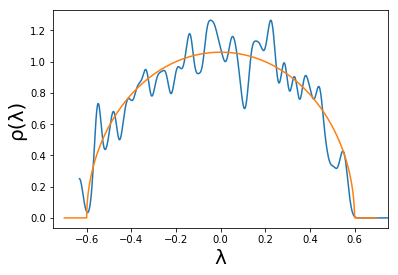

In [86]:
plt.figure(figsize = ())
plt.plot(λ, spectral_density(λ))
plt.plot(ee, wigner)
plt.xlabel('λ', fontsize = 20)
plt.ylabel('ρ(λ)', fontsize = 20)
plt.xlim([-0.75, 0.75])